In [1]:
%run py_import.py

### 一、Figure容器

**添加Axes对象**

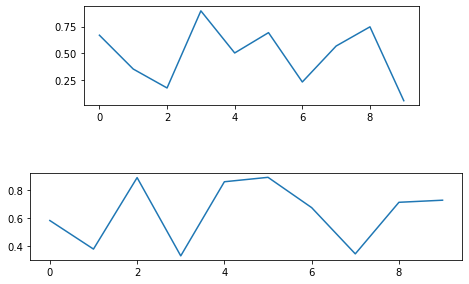

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(np.random.rand(10))

# left,bottom,width,height
ax2 = fig.add_axes([0,0,1,0.3])
ax2.plot(np.random.rand(10))

**操作当前Axes对象**

In [3]:
fig.sca(ax1)  # 设置当前Axes对象 Set Current Axes
print(fig.gca())  # 获取当前Axes对象  Get Current Axes

AxesSubplot(0.125,0.536818;0.775x0.343182)


**删除Axes对象**

In [ ]:
fig.delaxes(ax1)

**获取所有Axes**

In [4]:
for ax in fig.axes:
    print(ax)

AxesSubplot(0.125,0.536818;0.775x0.343182)
Axes(0,0;1x0.3)


### 二、Axes容器

**设置xy轴的最大最小值&添加文本**

Text(0, 0, '你好')

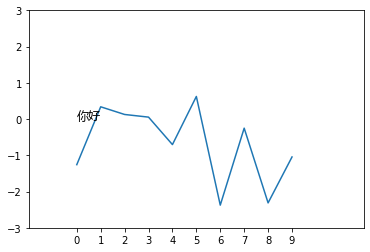

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.random.randn(10))
ax1.set_xlim(-2.0,12.0)  # 设置x轴的最大最小值
ax1.set_xticks(np.arange(10))   
ax1.set_ylim(-3,3)  # 设置y轴的最大最小值

ax1.text(0,0,'你好',fontdict = {'fontproperties':font})

**绘制双Y轴**

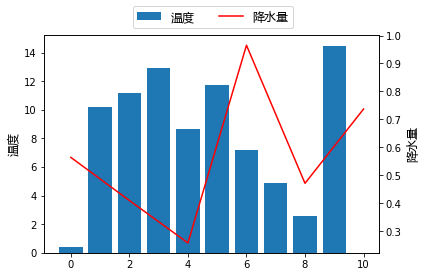

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(10),np.random.rand(10) * 20,label = "温度")
ax1.set_ylabel("温度",fontproperties = font)

ax2 = ax1.twinx()  # 克隆一个共享x轴的axes对象
ax2.plot(np.arange(0,12,2),np.random.rand(6),color = 'r',label = "降水量")
ax2.set_ylabel("降水量",fontproperties = font)

fig.legend(prop = font,loc = "upper center",ncol = 2)  # ncol设置图例为两列

### 三、Axis容器

**设置x轴和y轴label的位置**

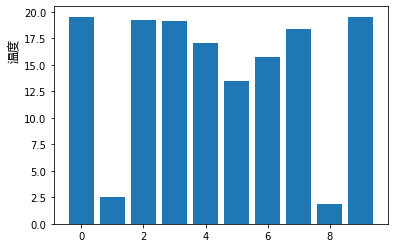

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(10),np.random.rand(10)*20,label = "温度")  # rand(10) 10个0-1之间的随机数
ax1.set_ylabel("温度",fontproperties = font)

ax1.yaxis.set_label_coords(-0.1,0.80)  # 设置标签轴位置

**设置刻度上的刻度格式**

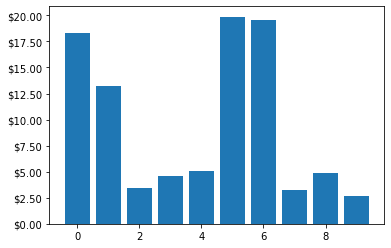

In [8]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(10),np.random.rand(10)*20,label = "温度")
formatter = ticker.FormatStrFormatter("$%0.2f")  # 创建格式化对象
ax1.yaxis.set_major_formatter(formatter)  # 设置格式化对象

**设置轴的属性**

<class 'matplotlib.text.Text'>


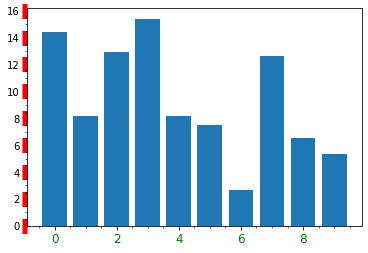

In [18]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(10),np.random.rand(10)*20,label = "温度")
xlabels = ax1.xaxis.get_ticklabels()

# 设置刻度上文本的属性
for label in xlabels:
    label.set_color('g')
    label.set_fontsize(12)
print(type(label))

# 设置刻度上线条的属性
ylines = ax1.yaxis.get_ticklines()
for line in ylines:
    line.set_markeredgecolor('r')
    line.set_markeredgewidth(15)
    line.set_markersize(5)
    
ax1.minorticks_on()  # 显示所有刻度

### 四、Tick容器

TypeError: 'NoneType' object is not iterable

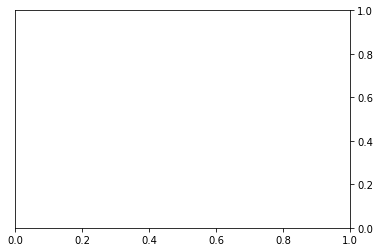

In [26]:
from matplotlib import ticker
fig = plt.figure()
ax1 = fig.add_subplot(111)
for tick in ax1.yaxis.tick_right():
    tick.label1On=False
    tick.label2On=True
plt.show()

### 笔记：
1. 图的构成：Figure是一个画板，上面可以有很多axes对象，每个axes对象都有轴axis、线条、title等
2. Figure上的相关操作，基本都是对Axes的一些操作：
    * 添加axes：add_subplot(221)/add_axes([left,bottom,width,height])
    * 当前axes：fig.gac()获取当前axes；fig.sac()设置当前axes
    * 删除axes：fig.delaxes(axes)
    * 获取所有axes：fig.axes保存了所有的axes对象
3. Axes对象：大部分的图像元素都绘制在Axes上
    * 通过set_xlim和set_ylim可以设置x、y轴的最大最小值
    * 通过text可以在Axes上添加文本，只需要指定x和y轴的坐标以及文字内容就可以了
    * 添加双Y轴，原理是两个Axes对象堆叠在一起，通过ax.twinx()来克隆一个新的Axes对象
4. Axis对象：代表的是x轴和y轴的对象。可以设置x轴的标题、刻度线条、刻度文本样式
5. Ticks对象：一般用来控制轴的位置